# Project 3: Wrangling Data

## Gather Data

We will be gathering data from three different sources:
- an on-hand file (`twitter-archive-enhanced.csv`)
- requesting from the internet (url) programmatically using the `Requests` library and from 
  URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- as JSON data using a Twitter API 

In [2]:
# Import packages

import pandas as pd
import numpy as np
import json
import requests
import tweepy
import re
import matplotlib.pyplot as plt
%matplotlib inline

#### Read on-hand file

In [3]:
# Read on-hand file

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#### Download tsv file programmatically from url

In [4]:
# Download tsv file programmatically from url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [5]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

#### Download Tweet JSON Data  for WeRateDogs with a Twitter API

In [25]:
consumer_key = 
consumer_secret = 
access_token = 
access_token_secret = 

In [26]:
tweetie_id = twitter_archive.tweet_id
tweetie_id[:6]

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
5    891087950875897856
Name: tweet_id, dtype: int64

- create api object
- (FOR LOOP) api.get_status for each tweet or list of tweet ids?
- (FOR LOOP) json.dump(

In [27]:
# LOAD API JSON data from We Rate Dogs tweets 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

tweets_not_found = []

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

with open('tweet_json.txt', 'w') as infile:
    for tweet in tweetie_id:
        try:
            tweetstatus = api.get_status(tweet, tweet_mode='extended')
            file_json = json.dumps(tweetstatus._json)
            infile.write(file_json + "\n")
        
        except tweepy.TweepError as te:
            tweets_not_found.append(tweet)

print('file_json type: ', type(file_json))
print('infile type: ', type(infile))

Rate limit reached. Sleeping for: 735
Rate limit reached. Sleeping for: 734
file_json type:  <class 'str'>
infile type:  <class '_io.TextIOWrapper'>


In [28]:
len(tweets_not_found)

13

In [6]:
# Read file into dataframe

twitter_dict = []

with open('tweet_json.txt', 'r') as openfile:
    try: 
        for line in openfile:
            tempdict = json.loads(line)
            twit_id = tempdict['id']
            retwit_count = tempdict['retweet_count']
            favorite_count = tempdict['favorite_count']
            twitter_dict.append ({'tweet_id' : twit_id,
                                  'retweet_count' : retwit_count, 
                                  'favorite_count' : favorite_count})
    
    except:
        print('failure at tweet id: ', twit_id)
        tweepy.TweepError
        
        

twitter_API = pd.DataFrame(twitter_dict, columns=['tweet_id', 'retweet_count', 'favorite_count'])


In [7]:
twitter_API.tweet_id.count()

2343

## Assess Data

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- The requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [8]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_archive.expanded_urls[0:3]

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
Name: expanded_urls, dtype: object

In [10]:
image_predictions.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [11]:
twitter_API.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8499,38520
1,892177421306343426,6247,33030
2,891815181378084864,4139,24861
3,891689557279858688,8616,41920
4,891327558926688256,9354,40068


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
# Check for duplicated columns among the three dataframes
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(twitter_API))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [14]:
twitter_archive.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [15]:
# Find rows with no dog name. i.e. Name equals 'None'

name_none = twitter_archive[twitter_archive.name=='None']
name_none.name.count()

745

In [16]:
name_none.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo


In [17]:
sum(twitter_archive.expanded_urls.value_counts())

2297

In [18]:
pd.set_option('display.max_colwidth', -1)

In [19]:
name_none[name_none.tweet_id == 891087950875897856].text

5    Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
Name: text, dtype: object

In [20]:
name_none[name_none.tweet_id == 891087950875897856].name

5    None
Name: name, dtype: object

In [21]:
# Checking the various values in the numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [22]:
# Checking the various values in the denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [23]:
# subset showing rows with the denominator other than 10
diff_denominator = twitter_archive[twitter_archive.rating_denominator != 10]
diff_denominator.shape

(23, 17)

In [24]:
diff_denominator = diff_denominator.iloc[1:, np.r_[0,5,10:13]]
diff_denominator

,tweet_id,text,rating_numerator,rating_denominator,name
342,832088576586297345,@docmisterio account started on 11/15/15,11,15,None
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,Sam
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11,None
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,None
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,None
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,this
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,None
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,None


In [25]:
twitter_archive.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [26]:
twitter_archive.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [27]:
twitter_archive.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [28]:
twitter_archive.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [29]:
twitter_archive[twitter_archive.pupper == 'pupper']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/886366144734445568/photo/1,https://twitter.com/dog_rates/status/886366144734445568/photo/1",12,10,Roscoe,None,None,pupper,None
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl https://t.co/D43I96SlVu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694511734784/photo/1,12,10,Gus,None,None,pupper,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
82,876838120628539392,NaN,NaN,2017-06-19 16:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ginger. She's having a ruff Monday. Too many pupper things going on. H*ckin exhausting. 12/10 would snug passionately https://t.co/j211oCDRs6,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/876838120628539392/photo/1,https://twitter.com/dog_rates/status/876838120628539392/photo/1",12,10,Ginger,None,None,pupper,None
92,874296783580663808,NaN,NaN,2017-06-12 16:06:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jed. He may be the fanciest pupper in the game right now. Knows it too. 13/10 would sign modeling contract https://t.co/0YplNnSMEm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874296783580663808/photo/1,13,10,Jed,None,None,pupper,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps:/…,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,"https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1",12,10,Sierra,None,None,pupper,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps://t.co/Xp01EU3qyD https://t.co/V5lkvrGLdQ,NaN,NaN,NaN,"https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://tw

In [30]:
image_predictions.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [31]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_predictions.tweet_id.duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

In [33]:
image_predictions.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [34]:
image_predictions.p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [35]:
image_predictions.p3_dog.value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

In [36]:
twitter_API.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8499,38520
1,892177421306343426,6247,33030
2,891815181378084864,4139,24861
3,891689557279858688,8616,41920
4,891327558926688256,9354,40068


In [37]:
twitter_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 3 columns):
tweet_id          2343 non-null int64
retweet_count     2343 non-null int64
favorite_count    2343 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


### Quality
`twitter_archive` table
- There should not be non-empty retweet rows under columns retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
- Five columns fill of NaN values and not necessary: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,
  retweeted_status_user_id, retweeted_status_timestamp
- Erroneous data type (timestamp): should be datetime.
- Values for the denominator not always extracted correctly the text
- Values for the numerator not always extracted correctly from the text
- Some rows have two dog stages and should only have one
- Some rows have an incorrect dog name
- Values in the ratings denominator column other than 10

`image prediction` table
- missing predictions records: only for 2075 dogs instead of 2356
- in columns p1_dog, p2_dog, p3_dog prediction is not a dog. It is false/not a dog 543, 522, and 576 times, respectively

`twitter API` table
- missing records: only 2343 instead of 2356

### Tidiness

`twitter_archive` table
- Dog maturity categories in 4 different columns should be in one
- Join tables twitter_archive, image_predictions, and twitter_API
- Columns 'source' and 'expanded urls' repeat except for tweet id and may not be necessary

## Cleaning

In [38]:
# Copy Dataframes

twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
twitter_API_clean = twitter_API.copy()

### `twitter archive` table

#### Define

Remove non-empty retweet rows

#### Code

In [39]:
twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()].iloc[:, np.r_[0,6:9]].count()

tweet_id                      181
retweeted_status_id           181
retweeted_status_user_id      181
retweeted_status_timestamp    181
dtype: int64

In [40]:
retweet_index = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()].iloc[:, np.r_[0,6:9]].index

In [41]:
twitter_archive_clean = twitter_archive_clean.drop(retweet_index, axis=0)

#### Test

In [42]:
twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()].iloc[:, np.r_[0,6:9]].count()

tweet_id                      0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
dtype: int64

In [43]:
twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Define

Remove unnecessary columns (first set):
Five columns fill of NaN values and not necessary for analysis: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. 

#### Code

In [45]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [46]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                            'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

### Test

In [47]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Define

Remove unnecessary columns (second set):
    columns 'source' and 'expanded urls' repeat except for tweet id and may not be necessary

#### Code

In [48]:
twitter_archive_clean = twitter_archive_clean.drop(['source', 'expanded_urls'], axis=1)

#### Test

In [49]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Define

a) Condense 4 different columns for dog maturity "stages" into one column

b) Determine rows with two dog stages

#### Code

In [50]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None


In [51]:
twitter_archive_clean['dogstage'] = 'None'

In [52]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogstage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None,None


In [53]:
for index in twitter_archive_clean.index:
    if twitter_archive_clean.doggo[index] == 'doggo':
        twitter_archive_clean.at[index, 'dogstage'] = 'doggo'
    elif twitter_archive_clean.floofer[index] == 'floofer':
        twitter_archive_clean.at[index, 'dogstage'] = 'floofer'
    elif twitter_archive_clean.pupper[index] == 'pupper':
        twitter_archive_clean.at[index, 'dogstage'] = 'pupper'
    elif twitter_archive_clean.puppo[index] == 'puppo':
        twitter_archive_clean.at[index, 'dogstage'] = 'puppo'

In [54]:
twitter_archive_clean.dogstage.value_counts()

None       1831
pupper     224 
doggo      87  
puppo      24  
floofer    9   
Name: dogstage, dtype: int64

In [55]:
# find rows by tweet id to drop or correct dog stage

dogcount=[]

for index in twitter_archive_clean.index:
    count=0
    if twitter_archive_clean.doggo[index] == 'doggo':
        count+=1
    if twitter_archive_clean.floofer[index] == 'floofer':
        count+=1
    if twitter_archive_clean.pupper[index] == 'pupper':
        count+=1
    if twitter_archive_clean.puppo[index] == 'puppo':
        count+=1
    if count>1:
        dogcount.append(index)

In [56]:
dogcount

[191, 200, 460, 531, 565, 575, 705, 733, 889, 956, 1063, 1113]

In [57]:
tofix = twitter_archive_clean.loc[dogcount, :]
len(tofix)

12

In [58]:
tofix

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogstage
191,855851453814013952,2017-04-22 18:31:02 +0000,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,13,10,None,doggo,None,None,puppo,doggo
200,854010172552949760,2017-04-17 16:34:26 +0000,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",11,10,None,doggo,floofer,None,None,doggo
460,817777686764523521,2017-01-07 16:59:28 +0000,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",13,10,Dido,doggo,None,pupper,None,doggo
531,808106460588765185,2016-12-12 00:29:28 +0000,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12,10,None,doggo,None,pupper,None,doggo
565,802265048156610565,2016-11-25 21:37:47 +0000,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",11,10,None,doggo,None,pupper,None,doggo
575,801115127852503040,2016-11-22 17:28:25 +0000,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,12,10,Bones,doggo,None,pupper,None,doggo
705,785639753186217984,2016-10-11 00:34:48 +0000,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,10,10,Pinot,doggo,None,pupper,None,doggo
733,781308096455073793,2016-09-29 01:42:20 +0000,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",12,10,None,doggo,None,pupper,None,doggo
889,759793422261743616,2016-07-31 16:50:42 +0000,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12,10,Maggie,doggo,None,pupper,None,doggo
956,751583847268179968,2016-07-09 01:08:47 +0000,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5,10,None,doggo,None,pupper,None,doggo


In [59]:
# Since rows with two dog stages are verified, drop four redundant dog stage columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [60]:
twitter_archive_clean.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None
611,797165961484890113,2016-11-11 19:55:50 +0000,@JODYHiGHROLLER it may be an 11/10 but what do I know 😉,11,10,None,None
898,758854675097526272,2016-07-29 02:40:28 +0000,"This is Lilli Bee &amp; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW",11,10,Lilli,None


#### Define

To maintain the structure of only one dog per row, remove rows with two dogs noted or a picture of more than one dog.

#### Code

In [61]:
twitter_archive_clean = twitter_archive_clean.drop([531, 565, 705, 733, 889, 1063, 1113], axis=0)

#### Test

In [62]:
removed_2dogs = np.array([531, 565, 705, 733, 889, 1063, 1113])

In [63]:
for d in removed_2dogs:
    print(d in twitter_archive_clean.index)

False
False
False
False
False
False
False


#### Define

Manually correct remainder rows

In [64]:
# Determine the remaining rows that need to be reviewed and possibly fix.
# Return tweet ids

dogs_tofix=[]
removed_2dogs=list(removed_2dogs)

for i in tofix.index:
    if i not in removed_2dogs:
        dogs_tofix.append(tofix['tweet_id'][i])

dogs_tofix

[855851453814013952,
 854010172552949760,
 817777686764523521,
 801115127852503040,
 751583847268179968]

In [65]:
twitter_archive_clean[twitter_archive_clean.tweet_id==dogs_tofix[0]]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage
191,855851453814013952,2017-04-22 18:31:02 +0000,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,13,10,None,doggo


In [66]:
twitter_archive_clean.loc[twitter_archive_clean[twitter_archive_clean.tweet_id==dogs_tofix[0]].index,'dogstage']='puppo'

In [67]:
twitter_archive_clean[twitter_archive_clean.tweet_id==dogs_tofix[1]]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage
200,854010172552949760,2017-04-17 16:34:26 +0000,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",11,10,None,doggo


In [68]:
twitter_archive_clean.loc[twitter_archive_clean[twitter_archive_clean.tweet_id==dogs_tofix[1]].index,'dogstage']='floofer'

In [69]:
twitter_archive_clean[twitter_archive_clean.tweet_id==dogs_tofix[2]]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage
460,817777686764523521,2017-01-07 16:59:28 +0000,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",13,10,Dido,doggo


In [70]:
twitter_archive_clean.loc[twitter_archive_clean[twitter_archive_clean.tweet_id==dogs_tofix[2]].index,'dogstage']='pupper'

In [71]:
twitter_archive_clean[twitter_archive_clean.tweet_id==dogs_tofix[3]]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage
575,801115127852503040,2016-11-22 17:28:25 +0000,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,12,10,Bones,doggo


In [72]:
twitter_archive_clean.loc[twitter_archive_clean[twitter_archive_clean.tweet_id==dogs_tofix[3]].index,'dogstage']='pupper'

In [73]:
twitter_archive_clean[twitter_archive_clean.tweet_id==dogs_tofix[4]]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage
956,751583847268179968,2016-07-09 01:08:47 +0000,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5,10,None,doggo


No change necessary. It is a doggo.

#### Test

In [74]:
twitter_archive_clean[twitter_archive_clean.tweet_id==dogs_tofix[0]]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage
191,855851453814013952,2017-04-22 18:31:02 +0000,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,13,10,None,puppo


In [75]:
twitter_archive_clean[twitter_archive_clean.tweet_id==dogs_tofix[1]]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage
200,854010172552949760,2017-04-17 16:34:26 +0000,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",11,10,None,floofer


In [76]:
twitter_archive_clean[twitter_archive_clean.tweet_id==dogs_tofix[2]]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage
460,817777686764523521,2017-01-07 16:59:28 +0000,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",13,10,Dido,pupper


In [77]:
twitter_archive_clean[twitter_archive_clean.tweet_id==dogs_tofix[3]]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage
575,801115127852503040,2016-11-22 17:28:25 +0000,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,12,10,Bones,pupper


In [78]:
twitter_archive_clean[twitter_archive_clean.tweet_id==dogs_tofix[4]]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage
956,751583847268179968,2016-07-09 01:08:47 +0000,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5,10,None,doggo


#### Define

Correct data type of column timestamp to datetime

#### Code

In [79]:
twitter_archive_clean['timestamp'] = twitter_archive_clean['timestamp'].str[:10]

twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'], format="%Y/%m/%d")

#### Test

In [80]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None
1,892177421306343426,2017-08-01,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None


#### Define

Extract correct values for the ratings (numerator and denominator) from the `text` column

In [81]:
# Save the 'original' cleaned dataset index
mod_index = twitter_archive_clean.index

In [82]:
twitter_archive_clean.reset_index(drop=True, inplace=True)

In [83]:
len(twitter_archive_clean)

2168

In [84]:
twitter_archive_clean['rating_full']=None
twitter_archive_clean.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage,rating_full
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None
1,892177421306343426,2017-08-01,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None


In [85]:
for drate in twitter_archive_clean.index:
    full_rate = re.findall('((?:\d+\.)?\d+)\/(\d+)', twitter_archive_clean['text'].at[drate])[-1]
    twitter_archive_clean.rating_full.at[drate] = full_rate

In [86]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage,rating_full
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,"(13, 10)"
1,892177421306343426,2017-08-01,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,"(13, 10)"
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,"(12, 10)"


In [87]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean.rating_full.str[0].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean.rating_full.str[1].astype(float)

In [88]:
twitter_archive_clean.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage,rating_full
1819,672272411274932228,2015-12-03,This is Pippin. He is terrified of his new little yellow giraffe. 11/10 https://t.co/ZICNl6tIr5,11.0,10.0,Pippin,None,"(11, 10)"
167,855459453768019968,2017-04-21,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",12.0,10.0,quite,None,"(12, 10)"
1828,672222792075620352,2015-12-03,This is Cal. He's a Swedish Geriatric Cheddar. Upset because the pope is laughing at his eyebrows. 9/10 https://t.co/EW4MsOrF5O,9.0,10.0,Cal,None,"(9, 10)"


In [89]:
twitter_archive_clean.drop('rating_full', axis=1, inplace=True)

#### Test

In [90]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,None
1,892177421306343426,2017-08-01,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,None
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,None
3,891689557279858688,2017-07-30,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,None
4,891327558926688256,2017-07-29,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,None


In [91]:
# shows that a numerator with a decimal is captured correctly.

twitter_archive_clean[twitter_archive_clean.tweet_id == 786709082849828864]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage
556,786709082849828864,2016-10-13,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0,Logan,None


In [92]:
twitter_archive_clean.dtypes

tweet_id              int64         
timestamp             datetime64[ns]
text                  object        
rating_numerator      float64       
rating_denominator    float64       
name                  object        
dogstage              object        
dtype: object

#### Define

Extract dog name

#### Code

In [93]:
dogname = twitter_archive_clean['text'].str.extract(r'(?:This is |Say hello to |Here is |Here\'s |Meet |named )([A-Z][a-z]+)', expand=True) 
dogname.head()

,0
0,Phineas
1,Tilly
2,Archie
3,Darla
4,Franklin


In [94]:
twitter_archive_clean['dogname']= dogname
twitter_archive_clean.sample(6)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage,dogname
1092,708853462201716736,2016-03-13,This is Lucy. She doesn't understand fetch. 8/10 try turning off and back on (vid by @rileyyoungblood) https://t.co/RXjEwpVJf0,8.0,10.0,Lucy,None,Lucy
1711,674737130913071104,2015-12-09,Meet Rufio. He is unaware of the pink legless pupper wrapped around him. Might want to get that checked 10/10 &amp; 4/10 https://t.co/KNfLnYPmYh,4.0,10.0,Rufio,pupper,Rufio
554,787322443945877504,2016-10-15,This is Lincoln. He forgot to use his blinker when he changed lanes just now. Guilty as h*ck. Still 10/10 https://t.co/lsrR83SiVp,10.0,10.0,Lincoln,None,Lincoln
591,781163403222056960,2016-09-28,"We normally don't rate lobsters, but this one appears to be a really good lobster. 10/10 would pet with caution https://t.co/YkHc7U7uUy",10.0,10.0,None,None,NaN
1041,713919462244790272,2016-03-27,This is Kanu. He's a Freckled Ticonderoga. Simply flawless. 12/10 would perform an elaborate heist to capture https://t.co/7vyAzIURrE,12.0,10.0,Kanu,None,Kanu
1778,673350198937153538,2015-12-06,This is Bella. She's a Genghis Flopped Canuck. Stuck in trash can. 9/10 not to happy about it https://t.co/RMv9EAv57u,9.0,10.0,Bella,None,Bella


In [95]:
twitter_archive_clean.name = twitter_archive_clean.dogname

In [96]:
twitter_archive_clean.drop('dogname', axis=1, inplace=True)

#### Test

In [97]:
twitter_archive_clean.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,None
1,892177421306343426,2017-08-01,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,None
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,None
3,891689557279858688,2017-07-30,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,None
4,891327558926688256,2017-07-29,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,None


In [98]:
# Dog names not extracted or available

twitter_archive_clean[twitter_archive_clean.name.isnull()].shape[0]

758

In [99]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168 entries, 0 to 2167
Data columns (total 7 columns):
tweet_id              2168 non-null int64
timestamp             2168 non-null datetime64[ns]
text                  2168 non-null object
rating_numerator      2168 non-null float64
rating_denominator    2168 non-null float64
name                  1410 non-null object
dogstage              2168 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 118.6+ KB


#### Define

Remove rows with a denominator greater than 10. These rows are for more than one dog together.

In [100]:
(twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]).shape

(16, 7)

In [101]:
twitter_archive_clean.rating_denominator.value_counts()

10.0     2152
50.0     2   
80.0     2   
150.0    1   
110.0    1   
90.0     1   
130.0    1   
70.0     1   
170.0    1   
120.0    1   
16.0     1   
20.0     1   
40.0     1   
7.0      1   
15.0     1   
Name: rating_denominator, dtype: int64

In [102]:
to_remove = twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]
to_remove

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage
287,832088576586297345,2017-02-16,@docmisterio account started on 11/15/15,11.0,15.0,NaN,None
363,820690176645140481,2017-01-15,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0,NaN,None
429,810984652412424192,2016-12-19,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0,Sam,None
728,758467244762497024,2016-07-28,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0,NaN,None
935,731156023742988288,2016-05-13,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0,NaN,None
1043,713900603437621249,2016-03-27,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0,NaN,None
1068,710658690886586372,2016-03-18,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0,NaN,None
1088,709198395643068416,2016-03-14,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0,NaN,None
1165,704054845121142784,2016-02-28,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0,NaN,None
1247,697463031882764288,2016-02-10,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0,NaN,None


In [103]:
twitter_archive_clean.drop(to_remove.index, inplace=True)

In [104]:
twitter_archive_clean.reset_index(inplace=True, drop=True)

#### Test

In [105]:
twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage


In [106]:
twitter_archive_clean.rating_denominator.value_counts()

10.0    2152
Name: rating_denominator, dtype: int64

### `image predictions` table

#### Define

In columns p1_dog, p2_dog, p3_dog, some predictions are not dogs, but another category. To condense three dog prediction columns to one showing a dog only prediction and None when no dog prediction.

In [107]:
image_predictions_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [108]:
image_predictions_clean.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [109]:
image_predictions_clean.p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [110]:
image_predictions_clean.p3_dog.value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

#### Code

In [111]:
image_predictions_clean[image_predictions_clean.p1_conf < image_predictions_clean.p2_conf]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [112]:
image_predictions_clean[image_predictions_clean.p2_conf < image_predictions_clean.p3_conf]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In this dataset, the confidence of the first prediction (p1_conf) is always greater than the confidence of the second prediction (p2_conf). In addition, the confidence of the second prediction (p2_conf) is always greater than the confidence of the third prediction (p3_conf).

In [113]:
len(image_predictions_clean.query('p1_dog == False & p2_dog == True'))

155

In [114]:
len(image_predictions_clean.query('p1_dog == False & p2_dog == False & p3_dog == True'))

64

In [115]:
image_predictions_clean['prediction'] = None

In [116]:
for dog in image_predictions_clean.index:
    if image_predictions_clean.p1_dog[dog] == True:
        image_predictions_clean.loc[dog, 'prediction'] = image_predictions_clean.p1[dog]
    elif image_predictions_clean.p1_dog[dog] == False:
        if image_predictions_clean.p2_dog[dog] == True:
            image_predictions_clean.loc[dog, 'prediction'] = image_predictions_clean.p2[dog]
        elif image_predictions_clean.p2_dog[dog] == False:
            if image_predictions_clean.p3_dog[dog] == True:
                image_predictions_clean.loc[dog, 'prediction'] = image_predictions_clean.p3[dog]               

In [117]:
image_predictions_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd


In [118]:
image_predictions_clean = image_predictions_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 
                                                       'p3_conf', 'p3_dog'], axis=1)

#### Test

In [119]:
image_predictions_clean.head()

,tweet_id,jpg_url,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


#### Define

Combine the three tables (twitter_archive, image_prediction, and twitter_API) into one table.

#### Code

In [120]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,None
1,892177421306343426,2017-08-01,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,None
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,None


In [121]:
image_predictions_clean.head(3)

,tweet_id,jpg_url,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd


In [122]:
twitter_API_clean.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8499,38520
1,892177421306343426,6247,33030
2,891815181378084864,4139,24861


In [123]:
twitter_archive_master = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how='inner')

In [124]:
twitter_archive_master = pd.merge(twitter_archive_master, twitter_API_clean, on = 'tweet_id', how = 'inner')

#### Test

In [125]:
twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage,jpg_url,prediction,retweet_count,favorite_count
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,8499,38520
1,892177421306343426,2017-08-01,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6247,33030
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4139,24861
3,891689557279858688,2017-07-30,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,8616,41920
4,891327558926688256,2017-07-29,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,9354,40068


In [126]:
len(twitter_archive_master)

1974

#### Define

- Missing predictions records: only for 2075 dogs instead of 2356 for `image prediction` table
- Missing records: only 2343 instead of 2356 for `twitter API` table

The tables were all merged together with inner join to the `twitter archive` table.

#### twitter_archive_master dataframe saved to csv file

In [127]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analysis

In [128]:
twitter_archive_master.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage,jpg_url,prediction,retweet_count,favorite_count
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,8499,38520
1,892177421306343426,2017-08-01,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6247,33030
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4139,24861


In [129]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 0 to 1973
Data columns (total 11 columns):
tweet_id              1974 non-null int64
timestamp             1974 non-null datetime64[ns]
text                  1974 non-null object
rating_numerator      1974 non-null float64
rating_denominator    1974 non-null float64
name                  1367 non-null object
dogstage              1974 non-null object
jpg_url               1974 non-null object
prediction            1668 non-null object
retweet_count         1974 non-null int64
favorite_count        1974 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 185.1+ KB


In [130]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.974000e+03,1974.000000,1974.0,1974.000000,1974.000000
mean,7.358277e+17,11.638693,10.0,2698.634245,8823.788754
std,6.765826e+16,40.846118,0.0,4725.774409,12672.773613
min,6.660209e+17,0.000000,10.0,12.000000,80.000000
25%,6.757507e+17,10.000000,10.0,598.250000,1888.750000
50%,7.081401e+17,11.000000,10.0,1294.000000,3986.500000
75%,7.879824e+17,12.000000,10.0,3102.500000,11087.000000
max,8.924206e+17,1776.000000,10.0,76675.000000,142312.000000


We will first take a look at the dog stage data.

In [131]:
twitter_archive_master.dogstage.value_counts()

None       1674
pupper     205 
doggo      64  
puppo      23  
floofer    8   
Name: dogstage, dtype: int64

In [132]:
vcounts = twitter_archive_master.dogstage.value_counts()
vcounts=vcounts.drop('None')

In [133]:
# Dog stages as percentages

vcounts/sum(vcounts)

pupper     0.683333
doggo      0.213333
puppo      0.076667
floofer    0.026667
Name: dogstage, dtype: float64

It appears that most of the dogs with a dog 'maturity' stage in the dataset are categorized as 'pupper' with about 68.3% of the categorized data. Floofer was categorized the least with only 2.7% of the 'maturity' stage categories.

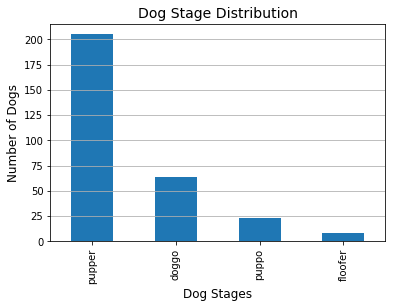

In [134]:
fig, ax = plt.subplots()
vcounts.plot(kind='bar')
ax.grid(which="major", axis='y')
ax.set_xlabel('Dog Stages', size=12)
ax.set_ylabel('Number of Dogs', size=12)
ax.set_title("Dog Stage Distribution", size=14)
plt.show()


Above shows a plot of the distribution of the dog stages mentioned in the text. The top dog stage is 'pupper' with 205 dogs. This was far and above other dog stages. The next popular dog stage was 'doggo' at 64. The least was 'floofer' with count of eight. Note that for 1674 of the records, a dog stage was not extracted or available.

In [135]:
len(twitter_archive_master.prediction.value_counts())

113

There were 113 predicted dog breeds.

In [136]:
top20dogs = twitter_archive_master.prediction.value_counts()[0:20]

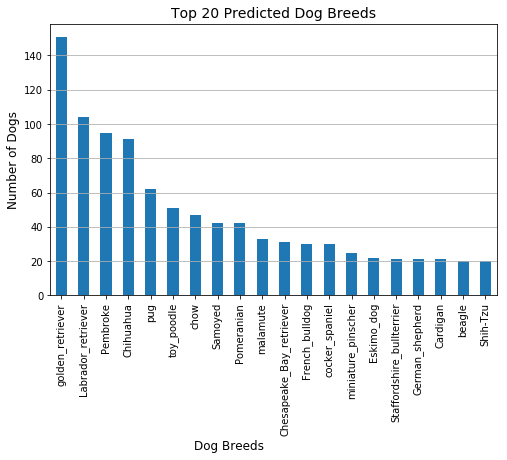

In [137]:
fig, ax = plt.subplots(figsize=(8,5))
top20dogs.plot(kind='bar')
ax.grid(which="major", axis='y')
ax.set_xlabel('Dog Breeds', size=12, x=0.4)
ax.set_ylabel('Number of Dogs', size=12)
ax.set_title('Top 20 Predicted Dog Breeds', size=14)
plt.show()

As mentioned above, there were 113 predicted dog breeds. The plot above shows the top 20 breeds. We can see in the plot above that the most predicted dog breed is the Golden Retriever with about 150 predictions followed by the Labrador Retriever with around 105. The Shih-Tzu rounds out the top 20 dogs with around 20 predictions.

In [138]:
twitter_archive_master.rating_numerator.describe()

count    1974.000000
mean     11.638693  
std      40.846118  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [139]:
(twitter_archive_master.rating_numerator).mode()

0    12.0
dtype: float64

In [140]:
twitter_archive_master[twitter_archive_master.rating_numerator==1776]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogstage,jpg_url,prediction,retweet_count,favorite_count
718,749981277374128128,2016-07-04,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0,Atticus,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,None,2687,5467


In [141]:
outlier1 = twitter_archive_master[twitter_archive_master.rating_numerator==1776].index
outlier1

Int64Index([718], dtype='int64')

(0, 20)

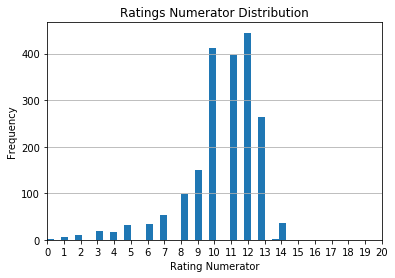

In [142]:
ratings_num = twitter_archive_master.rating_numerator
ratings_num = ratings_num.drop(outlier1)
ratings_num.plot(kind='hist', bins=1000)
plt.xticks(np.arange(0,21))
plt.grid(axis='y', which='major')
plt.title("Ratings Numerator Distribution")
plt.xlabel("Rating Numerator")
plt.xlim(xmin=0, xmax = 20)

In [143]:
ratings_num[0:10]

0    13.0
1    13.0
2    12.0
3    13.0
4    12.0
5    13.0
6    13.0
7    13.0
8    13.0
9    14.0
Name: rating_numerator, dtype: float64

We see above a distribution of the numerators and thus the ratings. The maximum x-axis scale was set to 20 as the great majority of numerators were below this value.

In [144]:
twitter_archive_master.rating_numerator.value_counts().sort_index()

0.00       2  
1.00       5  
2.00       10 
3.00       19 
4.00       16 
5.00       31 
6.00       33 
7.00       53 
8.00       98 
9.00       150
9.75       1  
10.00      411
11.00      396
11.26      1  
11.27      1  
12.00      445
13.00      263
13.50      1  
14.00      36 
420.00     1  
1776.00    1  
Name: rating_numerator, dtype: int64

We see from the statistical variables above that the average numerator is 11.6 and the median is 11. Since all the denominators in the cleaned dataset is 10, the median rating for the dogs is 11/10. The most frequent rating is 12/10. There is an outlier of 1776/10, but this is only one person commenting on the dog being 'really American'.

Sources were Overstack.com, Youtube.com, Data School(videos), pydata.org
